## Counting Labels of Deeplabcut

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
projectPath='/home/motorns/Documents/work/hoffman/Gitlab/labeleddata/WhiteRabbit-Chrissy-2020-03-18'
labelDirectory='labeled-data/chrissyproject'
labelFile='CollectedData_Chrissy.csv'

In [4]:
os.chdir(projectPath)

### Loading the csv file and dropping bodyparts column with frame names

In [5]:
labelResults = pd.read_csv(os.path.join(labelDirectory,labelFile),header=1)
labelResults = labelResults.drop('bodyparts',axis=1)

### Getting rid of repeat columns ending with .1 (for y axis). Melting the data frame so column names are rows. Finally, dropping na values for accurate value counts.

In [6]:
labelResults = labelResults.loc[:,~labelResults.columns.str.contains('.1')]
timesLabeled = pd.melt(labelResults,value_name='xcoord',var_name='bodypart').dropna()

### Generating the countplot with Seaborn.

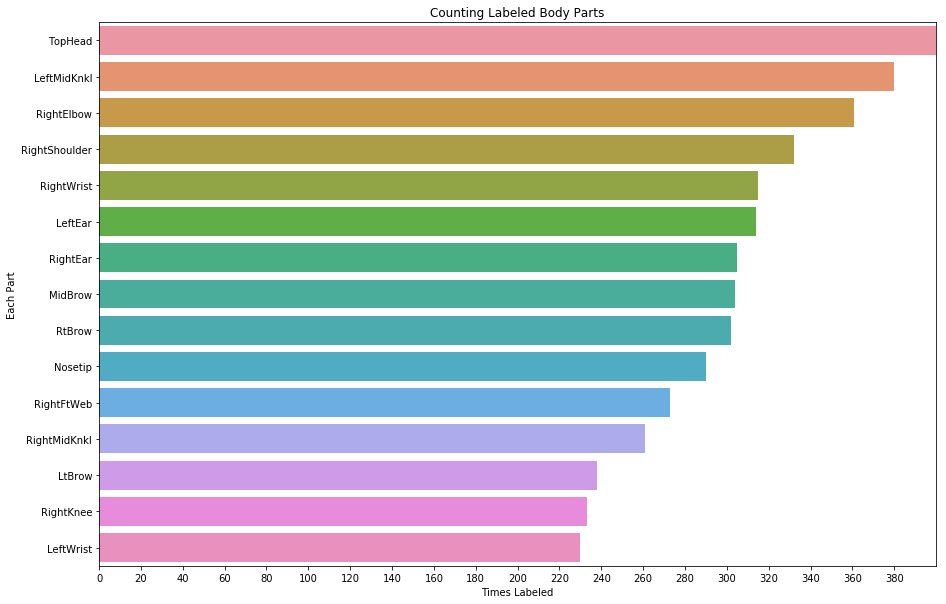

In [7]:
plt.figure(figsize=(15,10));
ax = sns.countplot(data=timesLabeled,y='bodypart',order=timesLabeled.bodypart.value_counts().index);
xlength=timesLabeled.bodypart.value_counts().max()
ax.set_title("Counting Labeled Body Parts")
ax.set_xlabel("Times Labeled")
ax.set_ylabel("Each Part")
ax.set_xticks(np.arange(0,xlength,step=20));
plt.xlim(0,xlength);

### Function to keep only most labeled body parts

In [8]:
def keepLabels(meltedFrame, cutOff):
    try:
        qualityLabels = meltedFrame.groupby('bodypart').filter(lambda x: x['bodypart'].value_counts() > cutOff)['bodypart'].unique()
    except:
        return meltedFrame.groupby('bodypart')['bodypart'].head().unique().tolist()
    return qualityLabels

### Filtering out the names of the body parts labeled at least 215 times each

In [9]:
toKeep = keepLabels(timesLabeled, 215)

### Loading the original csv unmodified

In [12]:
labels = pd.read_csv(os.path.join(labelDirectory,labelFile),header=None).reset_index().drop("index",axis=1)

### Getting the index of body parts matching the toKeep array

In [13]:
labels.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,scorer,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,...,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy,Chrissy
1,bodyparts,TopHead,TopHead,LeftWrist,LeftWrist,LeftEar,LeftEar,LeftMidKnkl,LeftMidKnkl,LtBrow,...,RightShoulder,RightShoulder,RightElbow,RightElbow,RightMidKnkl,RightMidKnkl,Nosetip,Nosetip,RtBrow,RtBrow
2,coords,x,y,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data/chrissyproject/img00500.png,115.15876041502915,23.958949064612455,210.23815044804283,155.881602735419,172.99872268511248,13.65868181103599,217.36910470051888,171.7281677409213,141.3055926741079,...,84.2579586542997,59.61372032699259,81.4848097783368,95.26849158937276,NaN,NaN,115.15876041502915,64.36768982864328,89.01192815595039,39.40934994497718
4,labeled-data/chrissyproject/img00501.png,112.38561153906625,25.147441440025148,211.42664282345552,156.27776686055657,173.39488681025003,17.620323062411558,218.9537612010691,171.7281677409213,136.94778729759477,...,NaN,NaN,83.46563040402458,94.0799992139601,NaN,NaN,112.38561153906625,67.14083870460618,87.42727165540015,41.78633469580251


In [14]:
idx = np.where(labels.iloc[1].isin(toKeep))[0]

### Re-inserting index 0, since Deeplabcut needs it for labels paths

In [15]:
idx = list(np.insert(idx, 0, 0))

In [16]:
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


### Subsetting the dataframe and writing back to the .csv file

In [ ]:
labels = labels.loc[:,labels.columns.isin(idx)]

In [ ]:
labels.to_csv(os.path.join(labelDirectory,labelFile),header=False,index=False)

### Updating Deeplabcut .h5 files with the selected labels

In [ ]:
import deeplabcut

In [ ]:
deeplabcut.convertcsv2h5(os.path.join(projectPath,'config.yaml'))